GOAL: Time series forecasting of avocado prices using fbprophet.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

In [2]:
avocado_df = pd.read_csv("avocado.csv")

In [3]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
avocado_df.shape

(18249, 14)

In [5]:
avocado_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
avocado_df = avocado_df.sort_values("Date")

In [8]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


VARIATION OF AVERAGE PRICE OF AVOCADO WITH DATE

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


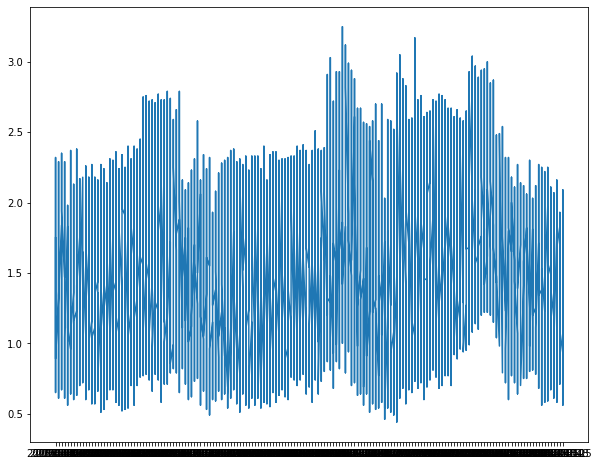

In [10]:
plt.figure(figsize=(10,8))
plt.plot(avocado_df.Date, avocado_df.AveragePrice)
plt.show()

COUNT OF DATA AVAILABLE PER REGION

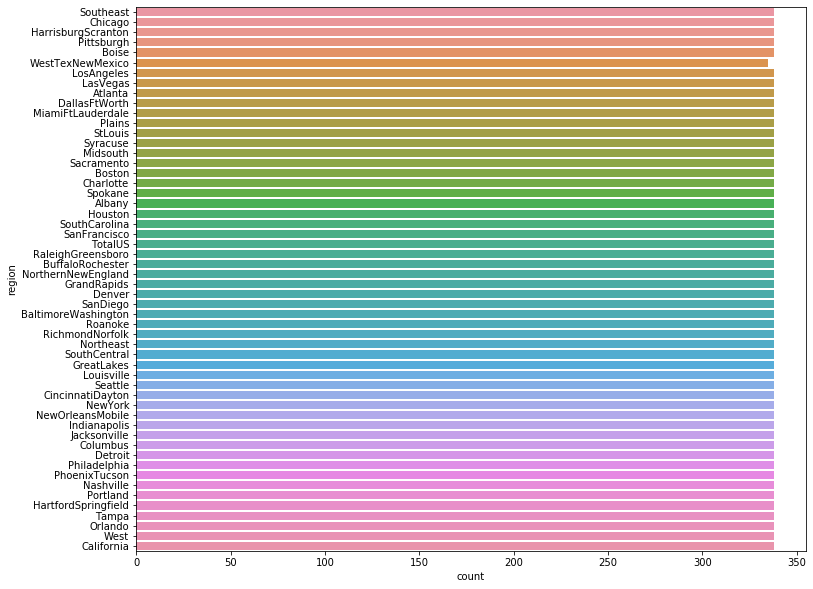

In [11]:
plt.figure(figsize=(12,10))
sns.countplot(y="region", data=avocado_df)
plt.show()

COUNT OF DATA PER YEAR

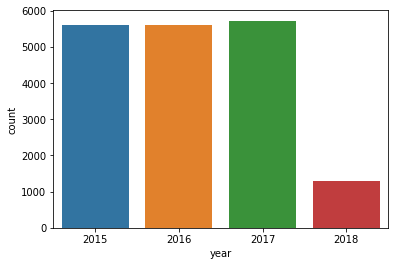

In [12]:
sns.countplot(x="year", data=avocado_df)
plt.show()

CONSIDERING ONLY DATE AND AVERAGE PRICE FOR TIME SERIES ANALYSIS

In [14]:
avocado_prophet = avocado_df[["Date","AveragePrice"]]
avocado_prophet.head()

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


RENAMING COLUMN NAMES AS REQUIRED BY FBPROPHET

In [15]:
avocado_prophet = avocado_prophet.rename(columns={"Date": "ds", "AveragePrice":"y"})
avocado_prophet.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


FITTING FBPROPHET

In [16]:
m = Prophet()
m.fit(avocado_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



FORECASTING FOR A PERIOD OF 1 YEAR

In [17]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [18]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498604,0.883261,1.855678,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
1,2015-01-04,1.498604,0.877039,1.870579,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
2,2015-01-04,1.498604,0.903341,1.880010,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
3,2015-01-04,1.498604,0.914668,1.846827,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
4,2015-01-04,1.498604,0.888617,1.823557,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
5,2015-01-04,1.498604,0.896740,1.858332,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
6,2015-01-04,1.498604,0.863170,1.887360,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
7,2015-01-04,1.498604,0.876256,1.871986,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
8,2015-01-04,1.498604,0.947887,1.866991,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
9,2015-01-04,1.498604,0.900893,1.861894,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119


PLOTTING THE FORECAST DATA

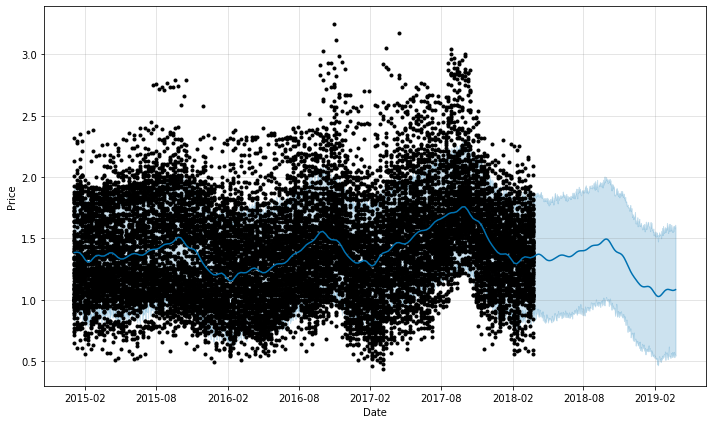

In [19]:
figure = m.plot(forecast, xlabel="Date", ylabel="Price")

We can observe that the forecast follows the past trend very well, thus the average price would decrease slightly considering all the regions.

PLOTTING SEASONAL TRENDS

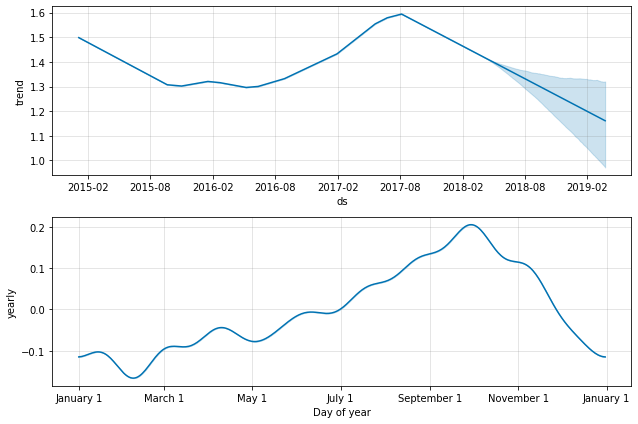

In [20]:
figure = m.plot_components(forecast)

We can observe that:

1) There is a decline in average price of avocado over the years and

2) The average price is least during february and highest during october within a year.

FORECASTING PRICES FOR A SINGLE REGION(WEST)

In [28]:
avocado_df_sample = avocado_df[ avocado_df["region"]=="West"]
avocado_df_sample.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
11879,49,2015-01-18,1.33,251749.94,64328.76,147608.30,69.05,39743.83,7442.17,32301.66,0.00,organic,2015,West
2752,48,2015-01-25,0.94,5461313.90,2695157.56,2031937.97,71550.57,662667.80,521877.70,140735.66,54.44,conventional,2015,West
11878,48,2015-01-25,1.52,166494.38,61454.35,68624.86,749.30,35665.87,9756.03,25909.84,0.00,organic,2015,West
2751,47,2015-02-01,0.84,8362504.08,3531350.44,3872672.00,80893.53,877588.11,705333.64,172154.91,99.56,conventional,2015,West
11877,47,2015-02-01,1.34,216484.22,89599.59,82183.07,184.99,44516.57,11083.16,33433.41,0.00,organic,2015,West


In [29]:
avocado_df_sample = avocado_df_sample.sort_values("Date")

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


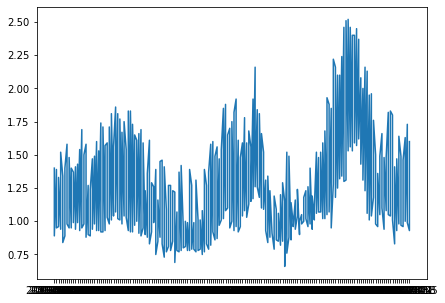

In [30]:
plt.figure(figsize=(7,5))
plt.plot(avocado_df_sample["Date"], avocado_df_sample["AveragePrice"])
plt.show()

In [31]:
avocado_sample_prophet = avocado_df_sample[["Date","AveragePrice"]]
avocado_sample_prophet.head()

,Date,AveragePrice
11881,2015-01-04,1.40
2755,2015-01-04,0.89
11880,2015-01-11,1.39
2754,2015-01-11,0.95
2753,2015-01-18,0.96


In [32]:
avocado_sample_prophet = avocado_sample_prophet.rename(columns=({"Date":"ds","AveragePrice":"y"}))
avocado_sample_prophet.head()

,ds,y
11881,2015-01-04,1.40
2755,2015-01-04,0.89
11880,2015-01-11,1.39
2754,2015-01-11,0.95
2753,2015-01-18,0.96


In [33]:
n = Prophet()
n.fit(avocado_sample_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [34]:
future = n.make_future_dataframe(periods=365)
forecast = n.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.287201,0.666842,1.520357,1.287201,1.287201,-0.187809,-0.187809,-0.187809,-0.187809,-0.187809,-0.187809,0.0,0.0,0.0,1.099392
1,2015-01-04,1.287201,0.672895,1.516308,1.287201,1.287201,-0.187809,-0.187809,-0.187809,-0.187809,-0.187809,-0.187809,0.0,0.0,0.0,1.099392
2,2015-01-11,1.284960,0.709877,1.523585,1.284960,1.284960,-0.171692,-0.171692,-0.171692,-0.171692,-0.171692,-0.171692,0.0,0.0,0.0,1.113268
3,2015-01-11,1.284960,0.703794,1.557745,1.284960,1.284960,-0.171692,-0.171692,-0.171692,-0.171692,-0.171692,-0.171692,0.0,0.0,0.0,1.113268
4,2015-01-18,1.282719,0.688865,1.541472,1.282719,1.282719,-0.163079,-0.163079,-0.163079,-0.163079,-0.163079,-0.163079,0.0,0.0,0.0,1.119640
5,2015-01-18,1.282719,0.683522,1.534967,1.282719,1.282719,-0.163079,-0.163079,-0.163079,-0.163079,-0.163079,-0.163079,0.0,0.0,0.0,1.119640
6,2015-01-25,1.280478,0.680887,1.547080,1.280478,1.280478,-0.174410,-0.174410,-0.174410,-0.174410,-0.174410,-0.174410,0.0,0.0,0.0,1.106068
7,2015-01-25,1.280478,0.708057,1.536304,1.280478,1.280478,-0.174410,-0.174410,-0.174410,-0.174410,-0.174410,-0.174410,0.0,0.0,0.0,1.106068
8,2015-02-01,1.278236,0.634482,1.497953,1.278236,1.278236,-0.195486,-0.195486,-0.195486,-0.195486,-0.195486,-0.195486,0.0,0.0,0.0,1.082750
9,2015-02-01,1.278236,0.675037,1.529064,1.278236,1.278236,-0.195486,-0.195486,-0.195486,-0.195486,-0.195486,-0.195486,0.0,0.0,0.0,1.082750


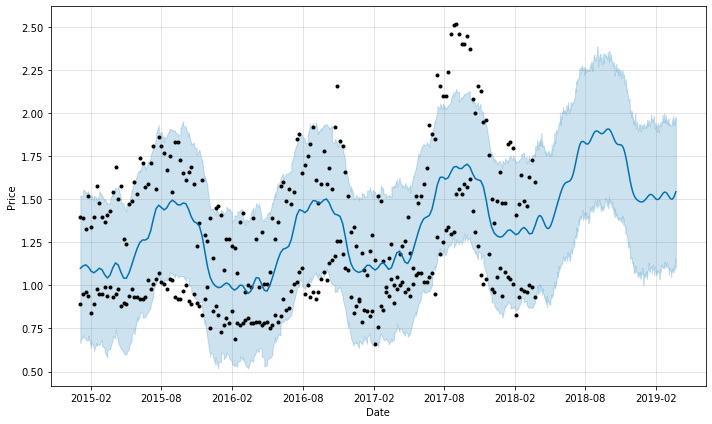

In [35]:
figure = n.plot(forecast, xlabel="Date", ylabel="Price")

We can observe that the forecast follows the past trend very well, thus the average price would increase in West.

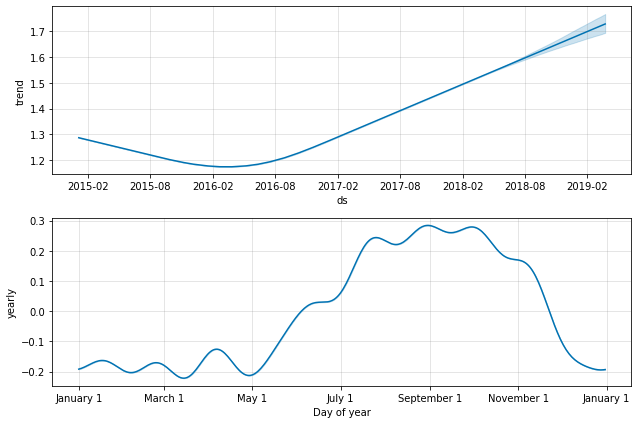

In [36]:
figure = n.plot_components(forecast)

We can observe that   : 

1) Average price of avocado in west is increasing over the years in contrast to decreasing price over all the regions together and 

2) Average price is less during the first half of the year and high during the second half of the year.

Conclusion: The model could produce a high-quality forecast for avocado price.